Spotify's Age Demographics:

Sources are from a thirdparty Website (January 9th 2025)! 

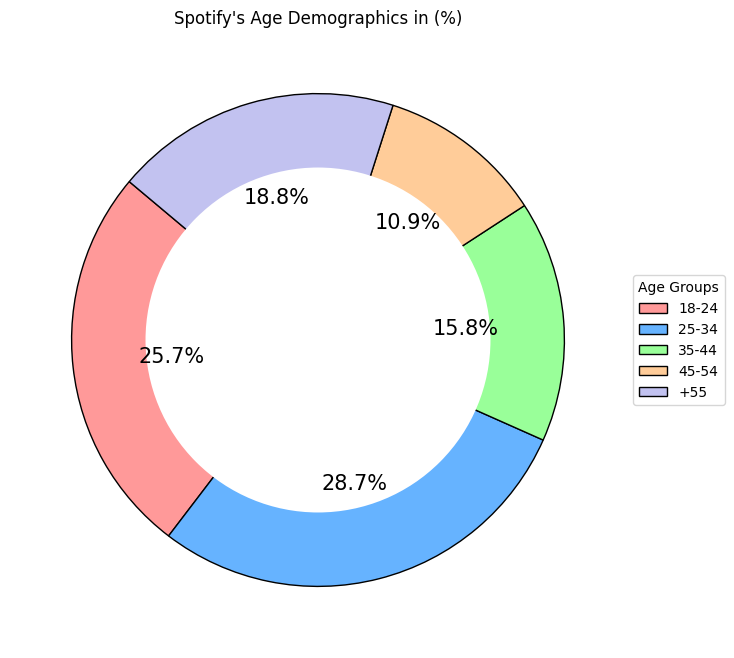

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file and skip header
df = pd.read_csv("Age.csv", skiprows=2, names=["Age Group", "Percentage"], dtype=str)

# Remove any leading or trailing whitespace
df = df.apply(lambda x: x.str.strip())

# Drop rows with missing values in the "Percentage" column
df = df.dropna(subset=["Percentage"])

# Remove invalid values (allow only numbers)
df = df[df["Percentage"].str.replace(",", ".").str.match(r"^\d+(\.\d+)?$")]

# Convert 'Percentage' to float
df["Percentage"] = df["Percentage"].astype(float)

# Values for the chart
age_groups = df["Age Group"].tolist()
percentages = df["Percentage"].tolist()

# Define colors
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"]

# Create donut chart
plt.figure(figsize=(8, 8))
wedges, _, autotexts = plt.pie(
    percentages, labels=[None] * len(age_groups), autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"}
)

# Create donut effect with a white circle in the center
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
plt.gca().add_artist(centre_circle)

# Adjust percentage text size and color
for autotext in autotexts:
    autotext.set_fontsize(15)
    autotext.set_color("black")

# Title and legend
plt.title("Spotify's Age Demographics in (%)")
plt.legend(wedges, age_groups, title="Age Groups", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.show() 